Introduction :

An organization wants to predict who possible defaulters are for the consumer loans product. They have data about historic customer behavior based on what they have observed. Hence when they acquire new customers they want to predict who is riskier and who is not.

Task Details:

An organization wants to predict who possible defaulters are for the consumer loans product. They have data about historic customer behavior based on what they have observed. Hence when they acquire new customers they want to predict who is riskier and who is not.


NOTE
The test_dataset was just a part of the Hackathon, the notebook you will be submitting should only train & test on train_data and predict a higher score.

About Data
ID: Id of the user(All Unique)

Income: Income of the user

Age: Age of the user

Experience: Professional experience of the user in years

Profession: Profession of the user

Married/Single: Whether married or not

House_Ownership: Owned or rented or neither

Car_Ownership: Does the person own a car

STATE: State of residence

CITY: City of residence

CURRENT_JOB_YRS: Years of experience in the current job

CURRENT_HOUSE_YRS: Number of years in the current residence

Risk_Flag: Defaulted on a loan(Target variable)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('Training Data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
df.CITY.value_counts()

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
df = df.drop('Id',axis = 'columns')

In [ ]:
df.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
df = df.rename(columns = {'Married/Single':'marriage_status', 'CITY':'City', 'STATE':'State'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   marriage_status    252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   City               252000 non-null  object
 8   State              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


In [ ]:
df.City.head(15)

0                    Rewa
1                Parbhani
2               Alappuzha
3             Bhubaneswar
4     Tiruchirappalli[10]
5                 Jalgaon
6                Tiruppur
7                Jamnagar
8                 Kota[6]
9              Karimnagar
10            Hajipur[31]
11                  Adoni
12              Erode[17]
13                 Kollam
14                Madurai
Name: City, dtype: object

In [ ]:
for i in range(len(df.City)):
    for j in df.City[i]:
        if j == '[':
            df.at[i,'City'] = df.City[i].split('[')[0]

In [ ]:
df.City.head(15)

0                Rewa
1            Parbhani
2           Alappuzha
3         Bhubaneswar
4     Tiruchirappalli
5             Jalgaon
6            Tiruppur
7            Jamnagar
8                Kota
9          Karimnagar
10            Hajipur
11              Adoni
12              Erode
13             Kollam
14            Madurai
Name: City, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   marriage_status    252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   City               252000 non-null  object
 8   State              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


In [ ]:
le = LabelEncoder()

In [ ]:
columns_df = [df.marriage_status,df.House_Ownership,df.Car_Ownership,df.Profession,df.State,df.City]
for k in columns_df:
    k = le.fit_transform(k)

In [ ]:
df.marriage_status = le.fit_transform(df.marriage_status)
df.House_Ownership = le.fit_transform(df.House_Ownership)
df.Car_Ownership = le.fit_transform(df.Car_Ownership)
df.Profession = le.fit_transform(df.Profession)
df.State = le.fit_transform(df.State)
df.City = le.fit_transform(df.City)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Income             252000 non-null  int64
 1   Age                252000 non-null  int64
 2   Experience         252000 non-null  int64
 3   marriage_status    252000 non-null  int64
 4   House_Ownership    252000 non-null  int64
 5   Car_Ownership      252000 non-null  int64
 6   Profession         252000 non-null  int64
 7   City               252000 non-null  int64
 8   State              252000 non-null  int64
 9   CURRENT_JOB_YRS    252000 non-null  int64
 10  CURRENT_HOUSE_YRS  252000 non-null  int64
 11  Risk_Flag          252000 non-null  int64
dtypes: int64(12)
memory usage: 23.1 MB


<Axes: >

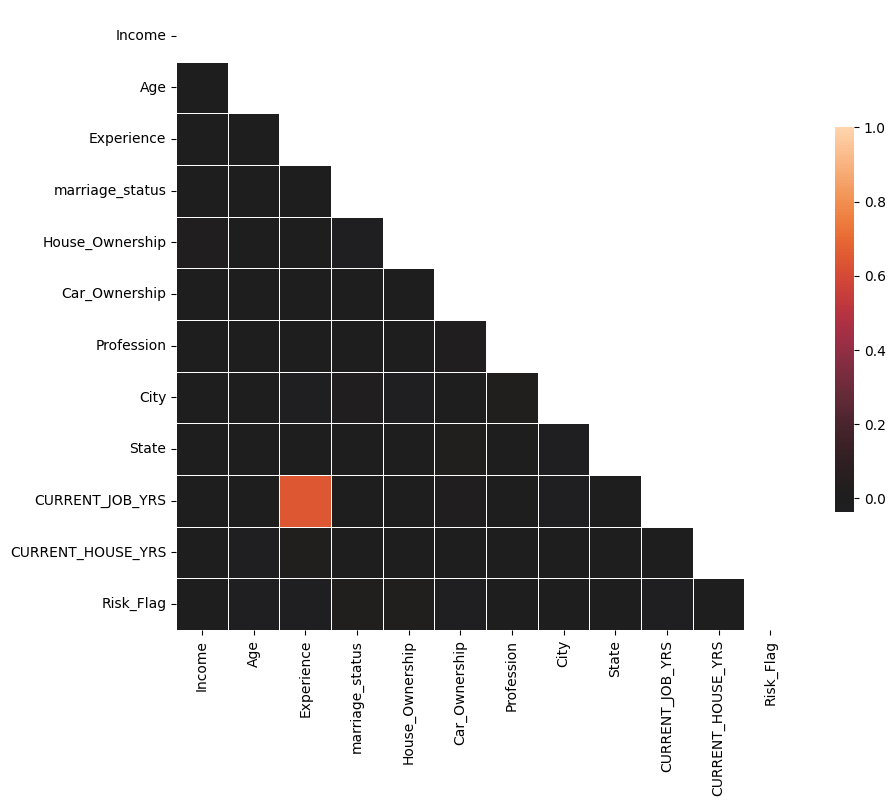

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
mat = df.corr()
mask = np.triu(np.ones_like(mat, dtype=bool))
sns.heatmap(data=mat, mask=mask,
            ax=ax,
            center=0, vmax=1, square=True,
            linewidths=.5, cbar_kws={"shrink": .5})

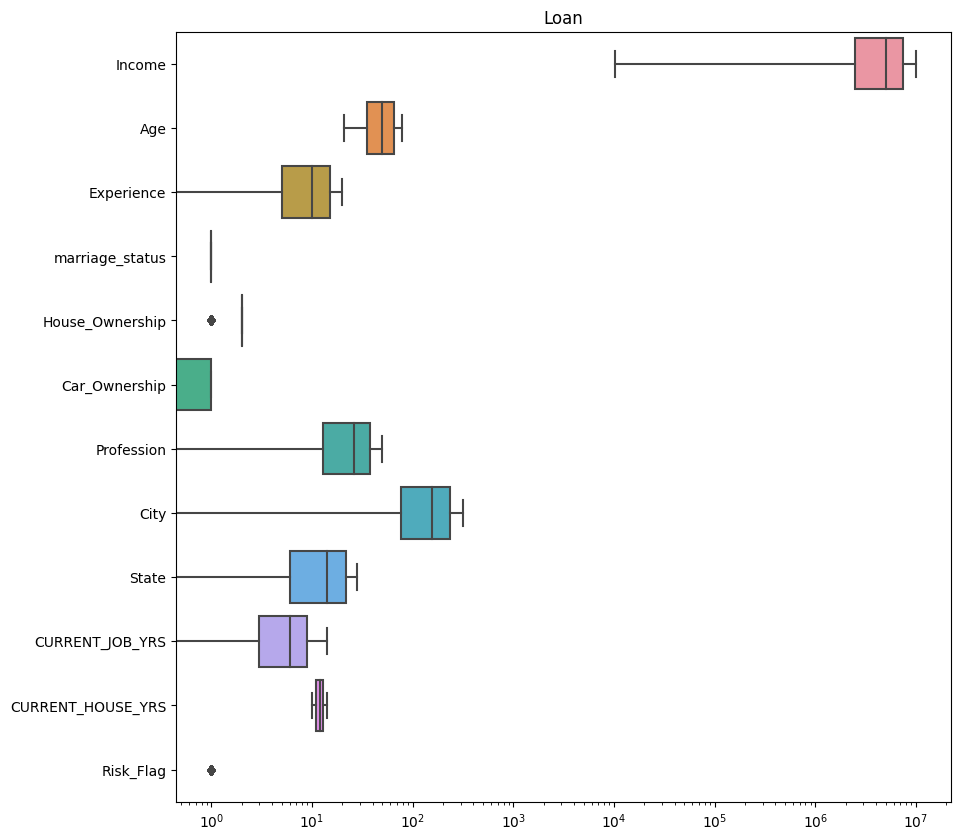

In [ ]:
fig,ax = plt.subplots(figsize = (10,10))
ax =sns.boxplot(data = df, orient="h")
ax.set_title('Loan')
ax.set(xscale="log")
plt.show()

In [ ]:
df.head(10)

,Income,Age,Experience,marriage_status,House_Ownership,Car_Ownership,Profession,City,State,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,250,13,3,13,0
1,7574516,40,10,1,2,0,43,226,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,53,17,2,12,1
4,5768871,47,11,1,2,0,11,295,22,3,14,1
5,6915937,64,0,1,2,0,11,129,14,0,12,0
6,3954973,58,14,0,2,0,31,298,22,8,12,0
7,1706172,33,2,1,2,0,20,133,6,2,14,0
8,7566849,24,17,1,2,1,25,164,20,11,11,0
9,8964846,23,12,1,2,0,2,148,23,5,13,0


In [ ]:
X = df.drop(['Risk_Flag'], axis = 'columns')
y = df.Risk_Flag

In [ ]:
X

,Income,Age,Experience,marriage_status,House_Ownership,Car_Ownership,Profession,City,State,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,1,2,0,33,250,13,3,13
1,7574516,40,10,1,2,0,43,226,14,9,13
2,3991815,66,4,0,2,0,47,8,12,4,10
3,6256451,41,2,1,2,1,43,53,17,2,12
4,5768871,47,11,1,2,0,11,295,22,3,14
...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,0,45,161,28,6,11
251996,2843572,26,10,1,2,0,3,250,13,6,11
251997,4522448,46,7,1,2,0,17,143,14,7,12
251998,6507128,45,0,1,2,0,27,232,18,0,10


In [ ]:
y

0         0
1         0
2         0
3         1
4         1
         ..
251995    0
251996    0
251997    0
251998    0
251999    0
Name: Risk_Flag, Length: 252000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [ ]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
rfc = RandomForestClassifier(random_state = 500)
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()

In [ ]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_probs = lr.predict_proba(X_test)[:,1]
accuracy = lr.score(X_test, y_test)
print('accuracy : ',accuracy)
print()
print(classification_report(y_test,y_pred))

accuracy :  0.8764790764790765

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     72888
           1       0.00      0.00      0.00     10272

    accuracy                           0.88     83160
   macro avg       0.44      0.50      0.47     83160
weighted avg       0.77      0.88      0.82     83160



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cf = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'],
                  index=['Actual 0', 'Actual 1'])
print(cf)

          Predicted 0  Predicted 1
Actual 0        72888            0
Actual 1        10272            0


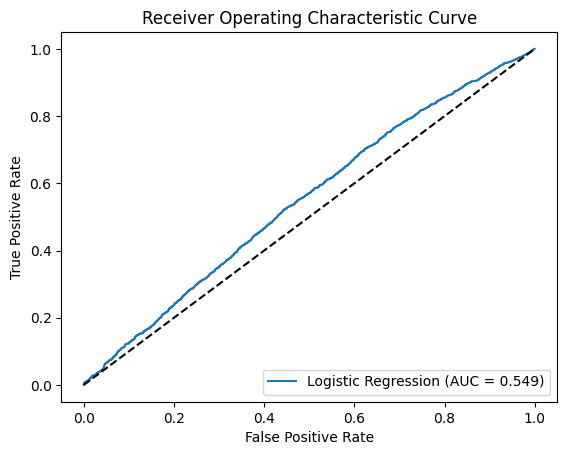

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_score = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.3f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
y_probs = rfc.predict_proba(X_test)[:,1]
accuracy = rfc.score(X_test, y_test)
print('accuracy : ', accuracy)
print()
print(classification_report(y_test,y_pred))

accuracy :  0.8993626743626744

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     72888
           1       0.61      0.52      0.56     10272

    accuracy                           0.90     83160
   macro avg       0.77      0.74      0.75     83160
weighted avg       0.89      0.90      0.90     83160



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cf = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'],
                  index=['Actual 0', 'Actual 1'])
print(cf)

          Predicted 0  Predicted 1
Actual 0        69410         3478
Actual 1         4891         5381


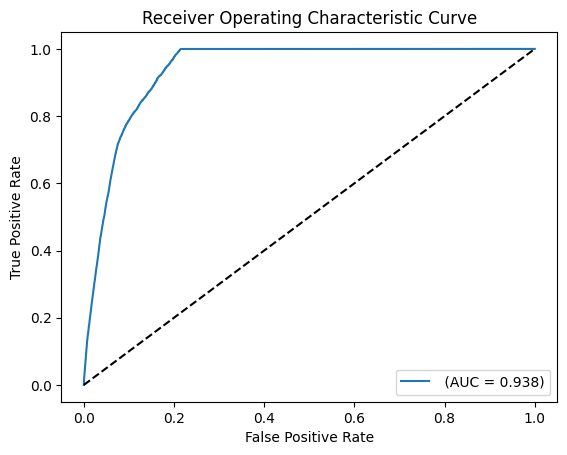

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_score = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=' (AUC = %0.3f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(leaf_size= 2, n_neighbors= 2, p= 1)
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2,metric='minkowski',p=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.8849206349206349

In [ ]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=10)
print(abs(cv.mean()))

0.8838900734423122


In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8847402597402597

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cf = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'],
                  index=['Actual 0', 'Actual 1'])
print(cf)

          Predicted 0  Predicted 1
Actual 0        70527         2361
Actual 1         7209         3063


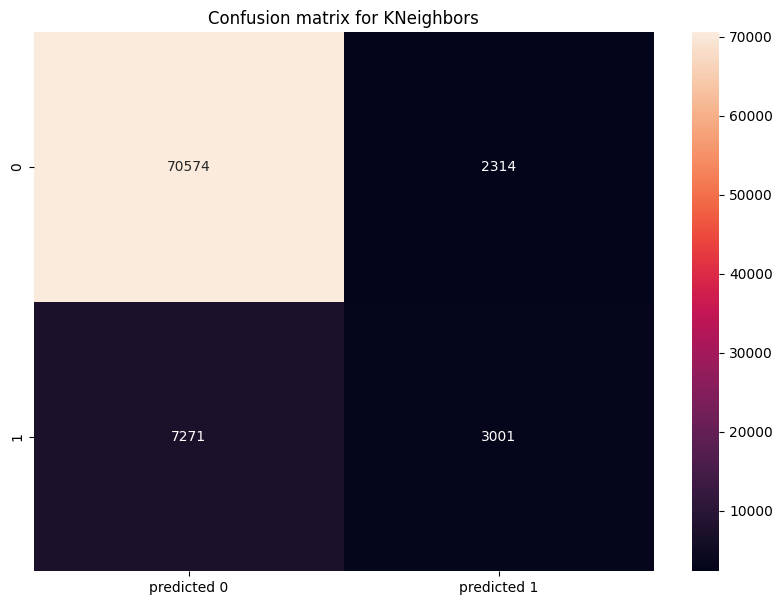

In [ ]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,predictions)
plt.figure(figsize=(10,7))
plt.title('Confusion matrix for KNeighbors')
df_cm=pd.DataFrame(cm1,index=[i for i in [0,1]],columns=[i for i in ['predicted 0','predicted 1']])
sns.heatmap(df_cm,annot=True,fmt='g');

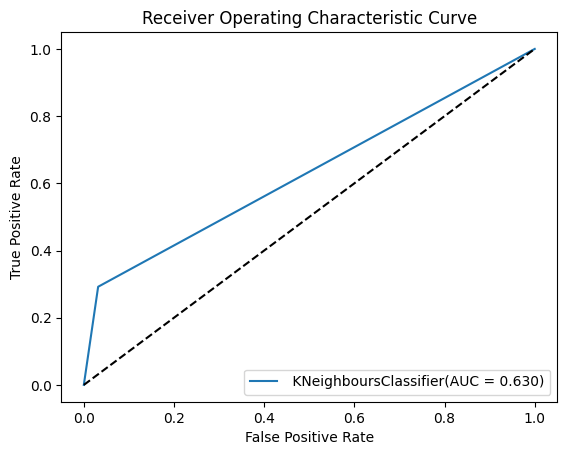

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(y_test,predictions)
roc_auc=auc(fpr,tpr)

plt.plot(fpr, tpr, label=' KNeighboursClassifier(AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy",random_state=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:,1]
accuracy = model.score(X_test, y_test)
accuracy

0.8821789321789322

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     72888
           1       0.52      0.55      0.54     10272

    accuracy                           0.88     83160
   macro avg       0.73      0.74      0.73     83160
weighted avg       0.89      0.88      0.88     83160



In [ ]:
cm = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'],
                  index=['Actual 0', 'Actual 1'])
print(df)

          Predicted 0  Predicted 1
Actual 0        67673         5215
Actual 1         4583         5689


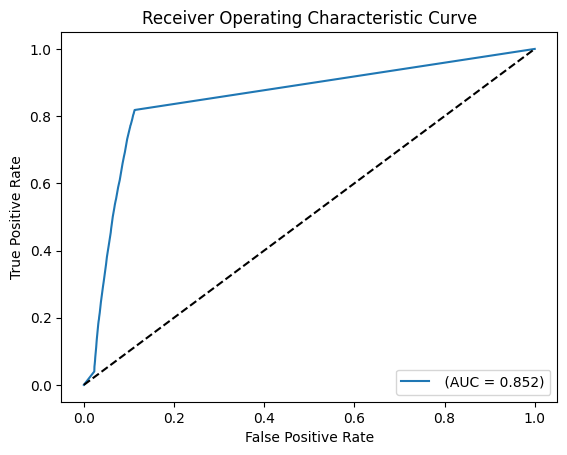

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_score = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=' (AUC = %0.3f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
y_probs = nb.predict_proba(X_test)[:,1]
accuracy = nb.score(X_test, y_test)

In [ ]:
print("accuray : ", accuracy)

accuray :  0.8764790764790765


In [ ]:
cm = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'],
                  index=['Actual 0', 'Actual 1'])
print(df)

          Predicted 0  Predicted 1
Actual 0        72888            0
Actual 1        10272            0


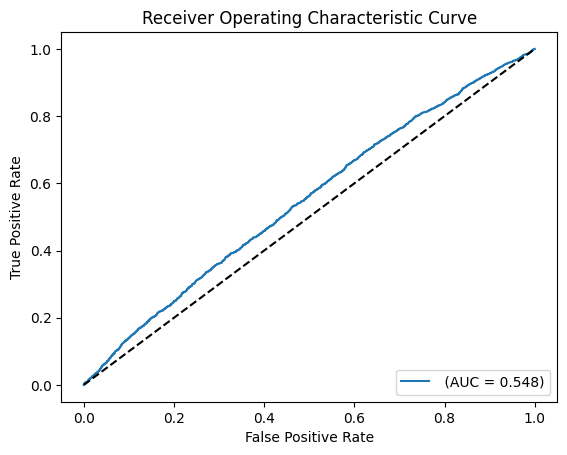

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_score = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=' (AUC = %0.3f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()